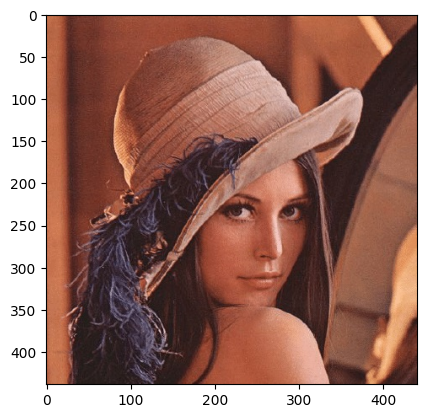

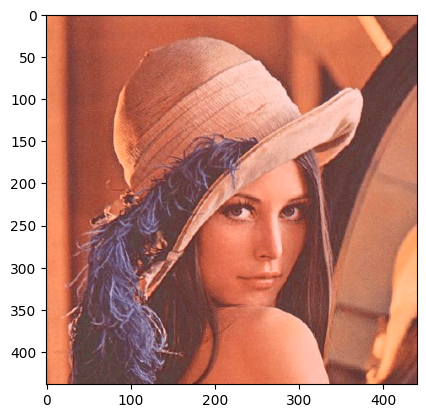

True

In [2]:
# Worksheet 4 - Colour Spaces Task 2

#option 1
import cv2 #open cv
import matplotlib.pyplot as plt;

def increase_brightness(img, value):   #where img is a BGR image 
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v= cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

img = cv2.imread('lena.jpg') #load rgb image
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(original_img)
plt.show()
brightness_factor = int(input("Enter brightness factor:"))
brightened = increase_brightness(img,brightness_factor)
brightened_rgb = cv2.cvtColor(brightened, cv2.COLOR_BGR2RGB)
plt.imshow(brightened_rgb)
plt.show()

cv2.imwrite("./outputs/brightened.jpg",brightened)


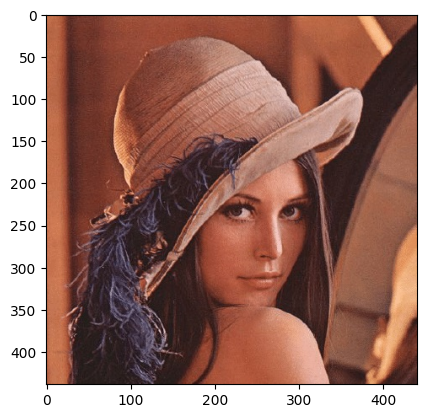

<function destroyAllWindows>

: 

In [1]:
# Worksheet 4 - Colour Spaces Task 2B

#option 1
import cv2 #open cv
import matplotlib.pyplot as plt;

def nothing(x):
 pass


def increase_brightness(imBGR, value):   #where img is a BGR image 
    hsv = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)
    h, s, v= cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    imBGR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return imBGR

cv2.namedWindow('Brightened_Image')
cv2.createTrackbar('Brighten factor', 'Brightened_Image', 0, 255, nothing)

img = cv2.imread('lena.jpg') #load rgb image
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(original_img) 
plt.show()


while(1):

    brightness_factor = cv2.getTrackbarPos('Brighten factor', 'Brightened_Image')
    brightenedBGR = increase_brightness(img,brightness_factor)
    #brightened_rgb = cv2.cvtColor(brightenedBGR, cv2.COLOR_BGR2RGB)
    cv2.imshow('Brightened_Image', brightenedBGR)

    key = cv2.waitKey(1)
    if key == 32 & 0xFF: 
        break

cv2.imwrite("./outputs/brightened.jpg",brightenedBGR)
cv2.destroyAllWindows

In [1]:
#Video Cam challenge.. increase brightness of live video

# Worksheet 4 - Colour Spaces Task 2B continued

#option 1
import cv2 #open cv
import matplotlib.pyplot as plt;

def nothing(x):
 pass


def increase_brightness(imBGR, value):   #where img is a BGR image 
    hsv = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)
    h, s, v= cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    imBGR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return imBGR

cv2.namedWindow('Brightened_Image')
cv2.createTrackbar('Brighten factor', 'Brightened_Image', 0, 255, nothing)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()


while(1):
    ret, frame = cap.read() # Capture frame-by-frame
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    brightness_factor = cv2.getTrackbarPos('Brighten factor', 'Brightened_Image')
    brightenedBGR = increase_brightness(frame,brightness_factor)
    #brightened_rgb = cv2.cvtColor(brightenedBGR, cv2.COLOR_BGR2RGB)
    brightened_BGR_scaled = cv2.resize(brightenedBGR, [600,300])
    cv2.imshow('Brightened_Image', brightened_BGR_scaled)

    key = cv2.waitKey(1)
    if key == 27 & 0xFF: 
        break

cv2.destroyAllWindows


True

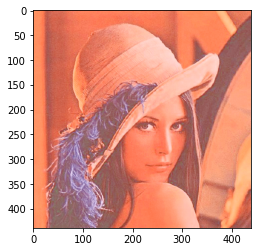

In [14]:
# option 2: using numpy arrays
import cv2 #open cv
import numpy as np
import matplotlib.pyplot as plt;

image = cv2.imread('lena.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

increase = 100

v = image[:, :, 2]
v = np.where(v <= 255 - increase, v + increase, 255) #condition, if yes, if no
image[:, :, 2] = v

image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)
brightened = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.imwrite("brightened.jpg",brightened)

(339, 509, 3)


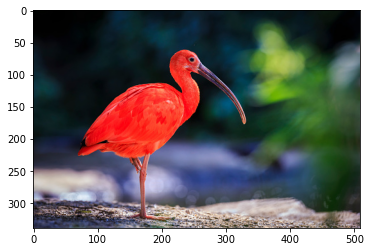

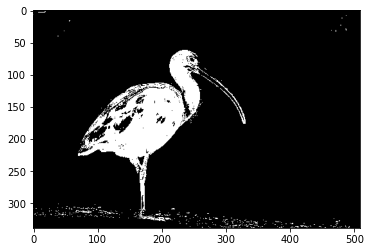

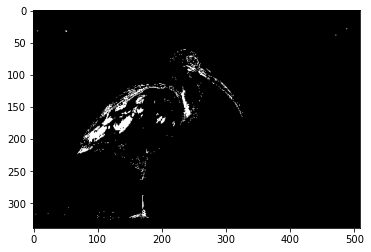

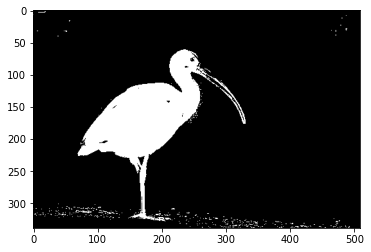

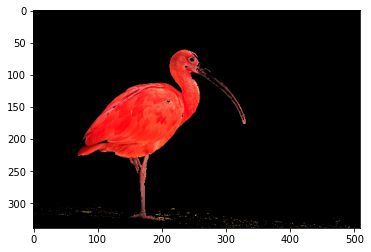

In [1]:

# Task 3
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im = cv2.imread('bird2.jpg')
print(im.shape)

imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

imHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

LowerRegion = np.array([0, 100, 0], np.uint8)
upperRegion = np.array([30, 255, 255], np.uint8)
mask1 = cv2.inRange(imHSV, LowerRegion, upperRegion)
plt.imshow(mask1, cmap='gray')
plt.show()
LowerRegion = np.array([160, 100, 0], np.uint8)
upperRegion = np.array([179, 255, 255], np.uint8)
mask2 = cv2.inRange(imHSV, LowerRegion, upperRegion)
plt.imshow(mask2, cmap='gray')
plt.show()

mask = mask1 + mask2
plt.imshow(mask, cmap='gray')
plt.show()

res1 = cv2.bitwise_and(imRGB, imRGB, mask=mask)

plt.imshow(res1)
plt.show()
